In [1]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [2]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400],
    window_sizes=[(0, 1)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=False,
)

Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.27it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

800 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.41it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.54it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2400 training samples, 1132 testing samples


100%|██████████| 10/10 [39:10<00:00, 223.04s/it]


In [3]:
df = evaluate.results_to_dataframe(word_results, char_results)

In [4]:
%store -r
#%store df

Stored 'df' (DataFrame)


                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 1       0.903213  0.031109       NaN
              K-Means  1       0.913683  0.024965  0.231337
              GMM      1       0.907801  0.024409  0.665497
     CharCNN  Baseline 1       0.842423  0.030100       NaN
              K-Means  1       0.868119  0.053041  0.196632
              GMM      1       0.856167  0.028201  0.350039
800  TokenCNN Baseline 1       0.928714  0.010090       NaN
              K-Means  1       0.925625  0.011033  0.549978
              GMM      1       0.931660  0.009074  0.316903
     CharCNN  Baseline 1       0.912924  0.018587       NaN
              K-Means  1       0.907655  0.021346  0.444616
              GMM      1       0.913710  0.031156  0.937875
1600 TokenCNN Baseline 1       0.943318  0.012124       NaN
              K-Means  1       0.941187 

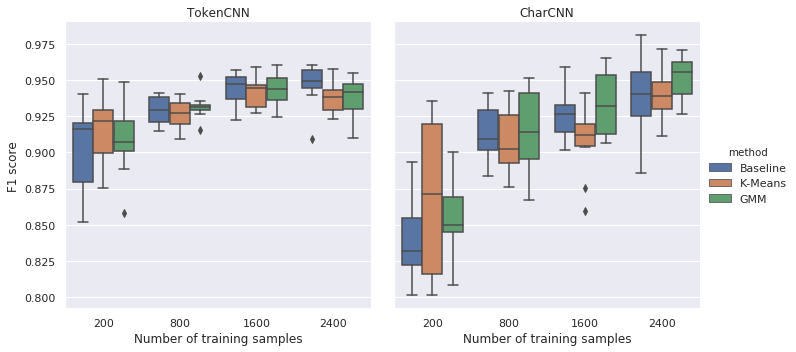

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window1"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

try:
    plt.savefig("plot.pdf")
    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
except e:
    print(e)
finally:
    os.chdir("..")